# Data analysis

### Here you can find the exploratory data analysis (EDA) to understand more about the "used car prices"-dataset.

### Load packages

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset

In [2]:
# import dataset and save it as df

df = pd.read_csv("car_prices.csv", on_bad_lines="skip")

# on_bad_lines="skip" otherwise it caused a problem

In [3]:
# show first two rows to check if the dataset is imported correctly 

df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


- year = year the car was put into the dataset           
- make = brand of the car           
- model = cars model            
- trim = cars version            
- body = cars type           
- transmission = cars drivetrain     
- vin = code            
- state = state where the car was sold           
- condition = condition of the car 0.0 - 5.0       
- odometer = miles of the car      
- color = cars color           
- interior = interior color         
- seller = seller           
- mmr = ratingprice              
- sellingprice = sellingprice     
- saledate = date of sale 

In [4]:
# print how many observations and columns the dataset exists of

print(f"We have {len(df.index):,} observations and {len(df.columns)} columns in our dataset.")

We have 558,811 observations and 16 columns in our dataset.


In [5]:
# overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [6]:
# print the names of all 16 coulmns

df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [7]:
# print datatype of the variables

df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [8]:
# print missing values

df.isna().sum()

# in transmission are relatively many missing values

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [9]:
# drop missing vales (dataset is still big enough)

df = df.dropna()

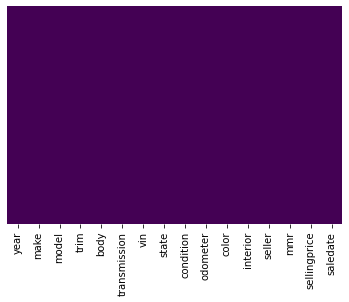

In [10]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [11]:
# show if there are still missing values

df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [12]:
# rename colums for better understanding (as described above)

df = df.rename(columns={
"make" : "brand",
"body" : "type",
"trim" : "version",
"transmission" : "drivetrain",
"vin" : "code",
"odometer" : "miles",
"mmr" : "ratingprice"} 
    )

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472336 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   brand         472336 non-null  object 
 2   model         472336 non-null  object 
 3   version       472336 non-null  object 
 4   type          472336 non-null  object 
 5   drivetrain    472336 non-null  object 
 6   code          472336 non-null  object 
 7   state         472336 non-null  object 
 8   condition     472336 non-null  float64
 9   miles         472336 non-null  float64
 10  color         472336 non-null  object 
 11  interior      472336 non-null  object 
 12  seller        472336 non-null  object 
 13  ratingprice   472336 non-null  int64  
 14  sellingprice  472336 non-null  int64  
 15  saledate      472336 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 61.3+ MB


In [14]:
# transform into lowercase

df["brand"] = df["brand"].str.lower()
df["model"] = df["model"].str.lower()
df["type"] = df["type"].str.lower()
df["drivetrain"] = df["drivetrain"].str.lower()
df["state"] = df["state"].str.lower()
df["version"] = df["version"].str.lower()
df["color"] = df["color"].str.lower()
df["interior"] = df["interior"].str.lower()
df["seller"] = df["seller"].str.lower()


In [15]:
df.head(2)

,year,brand,model,version,type,drivetrain,code,state,condition,miles,color,interior,seller,ratingprice,sellingprice,saledate
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


# Categorial or numeric?

* year = categorial
* brand = categorial
* model = categorial
* version = categorial
* type = categorial
* drivetrain = categorial
* code = categorial
* state = categorial
* condition = categorial
* miles = numeric
* color = categorial
* interior = categorial
* seller = categorial
* ratingprice = numeric
* sellingprice = numeric
* saledate = categorial

In [16]:
# transform into categorial variables

for cat in ["year", "brand", "model", "version", "type", "drivetrain", "code", "state", "condition", "color", "interior", "seller", "saledate"]:
    df[cat] = df[cat].astype("category")

In [17]:
df.dtypes

year            category
brand           category
model           category
version         category
type            category
drivetrain      category
code            category
state           category
condition       category
miles            float64
color           category
interior        category
seller          category
ratingprice        int64
sellingprice       int64
saledate        category
dtype: object

In [18]:
df.describe(include="category").T

,count,unique,top,freq
year,472336,26,2013,87474
brand,472336,53,ford,81014
model,472336,764,altima,16346
version,472336,1488,base,48782
type,472336,45,sedan,211308
drivetrain,472336,2,automatic,455974
code,472336,465779,1ftfw1cv5afb30053,4
state,472336,34,fl,75243
condition,472336.0,41.0,1.9,36652.0
color,472336,20,black,93245


In [19]:
# crating variable list for numeric and categorial variables

# list of all numerical data
list_num = df.select_dtypes(include=[np.number]).columns.tolist()

# list of all categorical data
list_cat = df.select_dtypes(include=['category']).columns.tolist()

print(list_num, list_cat)


['miles', 'ratingprice', 'sellingprice'] ['year', 'brand', 'model', 'version', 'type', 'drivetrain', 'code', 'state', 'condition', 'color', 'interior', 'seller', 'saledate']


## Categorical Data

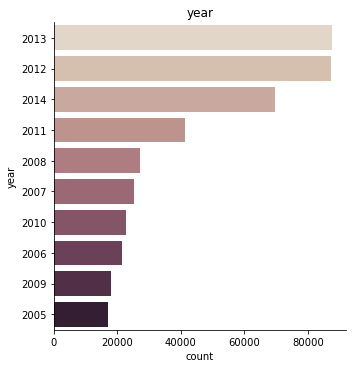

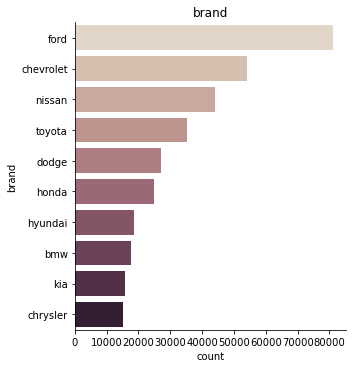

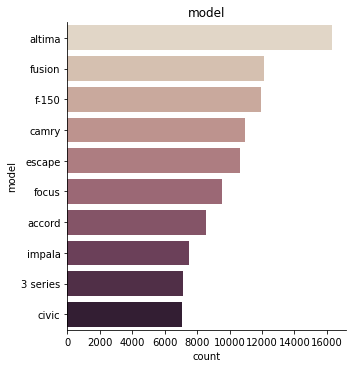

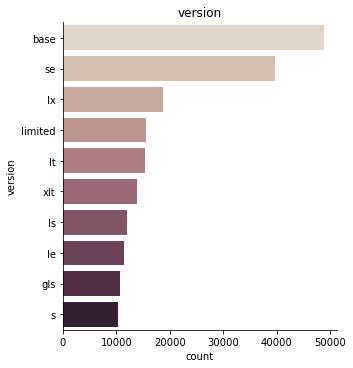

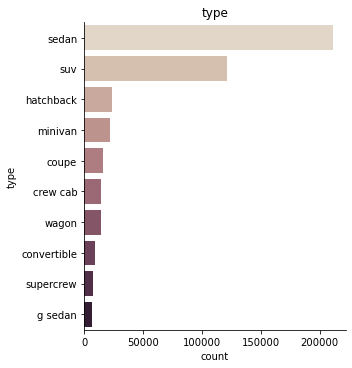

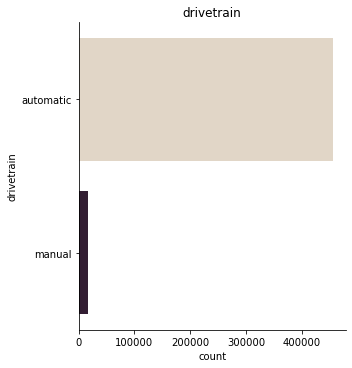

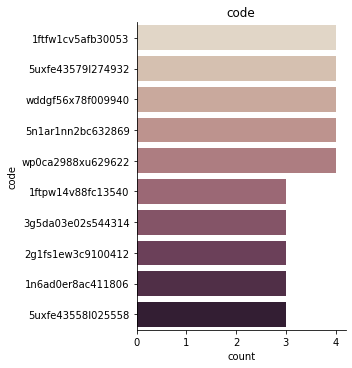

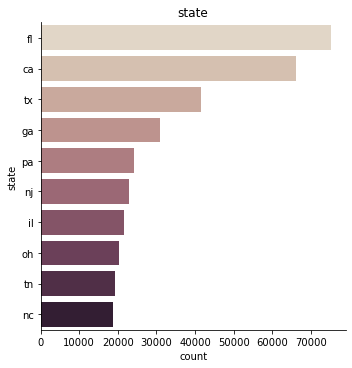

/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


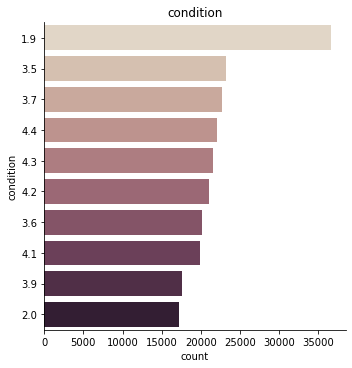

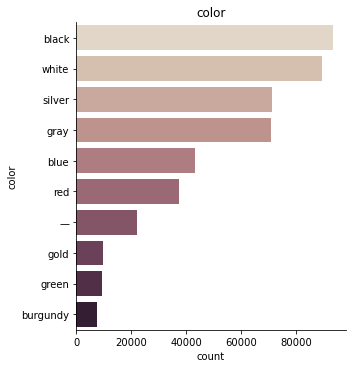

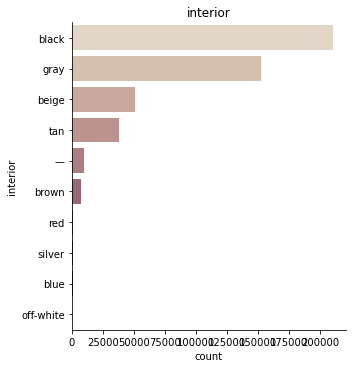

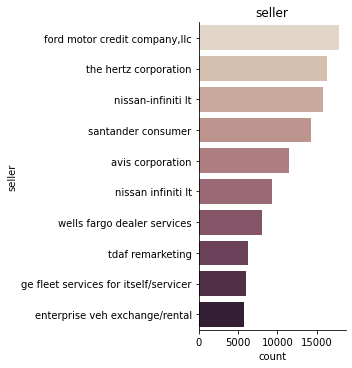

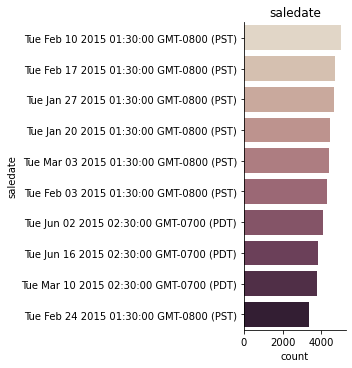

In [20]:
# print plots for top 10 of each variable

for i in list_cat:

    TOP_10 = df[i].value_counts().iloc[:10].index

    g = sns.catplot(y=i, 
            kind="count", 
            palette="ch:.25", 
            data=df,
            order = TOP_10)    
    
    plt.title(i)
    plt.show();

In [21]:
# Numercial gruped by categorical
# median
for i in list_cat:
    print(df.groupby(i).median().round(2).T)

year              1990      1991      1992      1993      1994      1995  \
miles         129102.0  170874.0  155093.0  169391.0  161863.0  168899.0   
ratingprice      725.0     625.0     600.0     675.0     662.5     725.0   
sellingprice     400.0     400.0     450.0     600.0     500.0     550.0   

year              1996      1997      1998      1999  ...      2006      2007  \
miles         167503.0  164794.0  163159.5  157773.0  ...  114489.0  107339.5   
ratingprice      800.0     925.0    1075.0    1225.0  ...    5325.0    6675.0   
sellingprice     650.0     800.0     950.0    1050.0  ...    5100.0    6700.0   

year             2008     2009     2010     2011     2012     2013     2014  \
miles         97186.0  88696.0  76839.0  53307.0  37766.0  35032.0  19550.0   
ratingprice    8175.0   8700.0  10350.0  14750.0  14050.0  14550.0  17350.0   
sellingprice   8100.0   8700.0  10300.0  14500.0  14100.0  14500.0  17300.0   

year             2015  
miles         11502.5  
ratin

code          137za84341e193591  19uua5640xa034760  19uua5640xa053244  \
miles                   65612.0           233154.0           175516.0   
ratingprice             43400.0             1075.0             1325.0   
sellingprice            45750.0             1050.0             2100.0   

code          19uua5641xa040227  19uua5641xa053415  19uua5642xa002702  \
miles                  130002.0           153673.0           121985.0   
ratingprice              1975.0             1500.0             1725.0   
sellingprice             2800.0             1450.0             2000.0   

code          19uua5643xa001218  19uua5643xa046935  19uua5644xa010087  \
miles                       1.0           111021.0           180488.0   
ratingprice              2425.0             2075.0             1225.0   
sellingprice              900.0             2200.0             1000.0   

code          19uua5644xa036284  ...  zff65ljaxc0183109  zff65tja4c0187060  \
miles                  195020.0  ...       

seller        1 cochran of monroeville  101motors  143 auto sales inc  \
miles                         108469.0    98491.0             92286.5   
ratingprice                     3925.0     3800.0              6125.0   
sellingprice                    4200.0     3750.0              5150.0   

seller        159191 canada inc  1st advantage fcu  1st capital finance  \
miles                   57169.0            71478.0             200903.0   
ratingprice             20250.0             9337.5                600.0   
sellingprice            19100.0             8900.0                400.0   

seller        1st choice automotive corp  1st choice credit union  \
miles                           105993.0                  99599.0   
ratingprice                       6600.0                  10100.0   
sellingprice                      7600.0                  10000.0   

seller        1st choice money center  1st class auto  ...  \
miles                         78577.0        103321.0  ...   
ratin

## Numerical data

In [22]:
# summary of numerical attributes
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
miles,472336.0,66701.07,51939.18,1.0,28137.0,51084.0,96589.0,999999.0
ratingprice,472336.0,13837.00,9532.13,25.0,7425.0,12300.0,18300.0,182000.0
sellingprice,472336.0,13690.40,9612.96,1.0,7200.0,12200.0,18200.0,230000.0


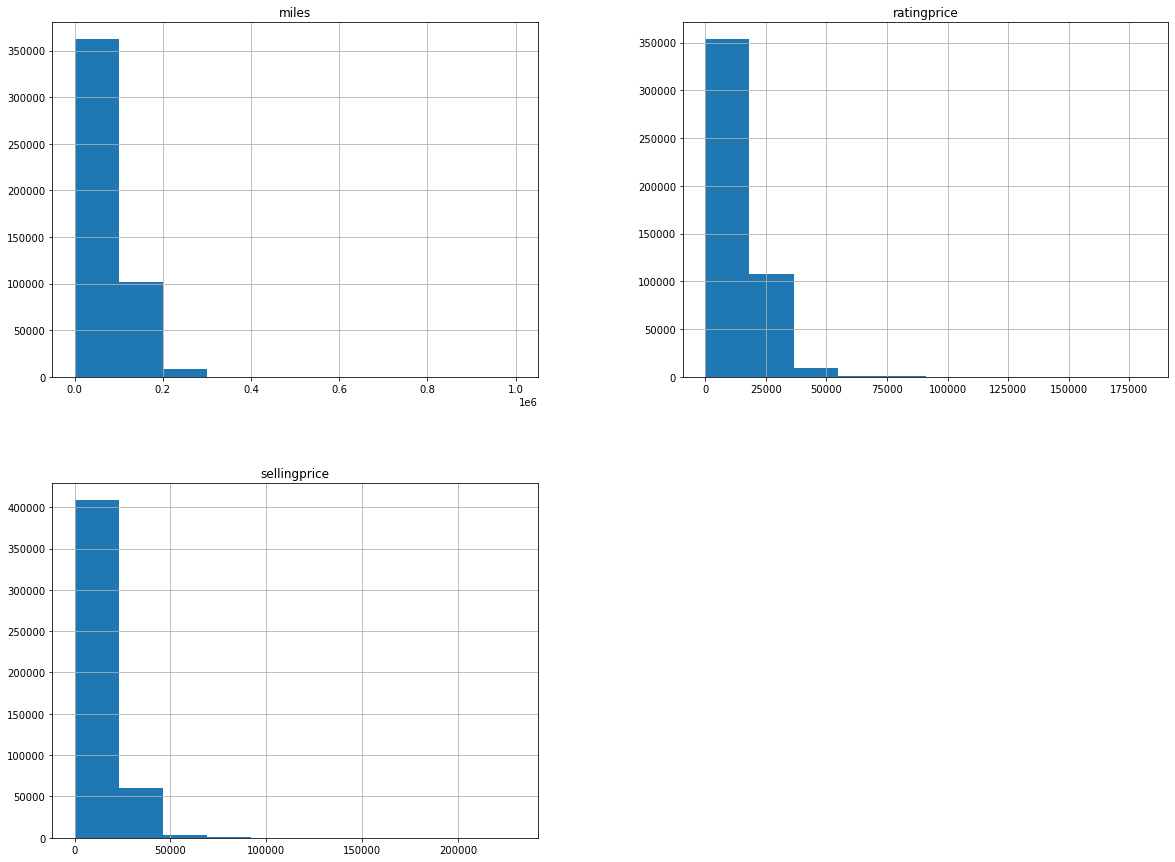

In [23]:
# histograms
df.hist(figsize=(20, 15));

In [24]:
sns.set_theme(style="ticks", color_codes=True)

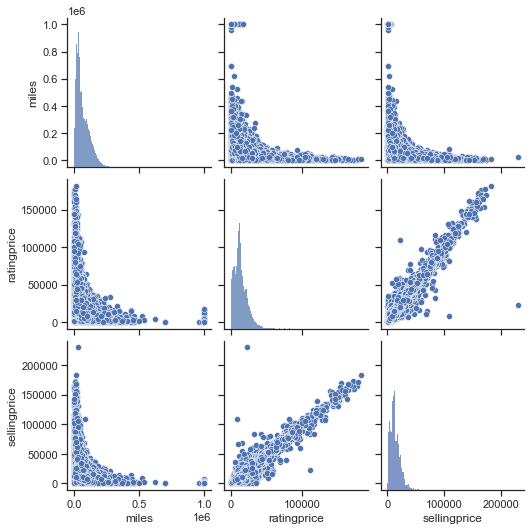

In [25]:
sns.pairplot(df);

<AxesSubplot:xlabel='miles', ylabel='sellingprice'>

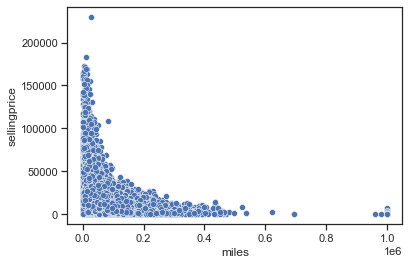

In [26]:
sns.scatterplot(data=df, x="miles", y="sellingprice")

<AxesSubplot:xlabel='ratingprice', ylabel='Count'>

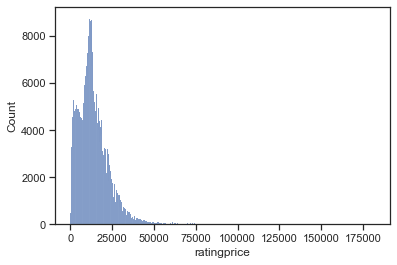

In [27]:
sns.histplot(data=df, x="ratingprice")

<AxesSubplot:xlabel='sellingprice', ylabel='Count'>

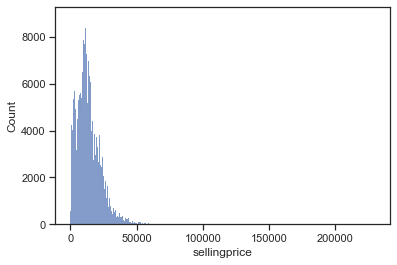

In [28]:
sns.histplot(data=df, x="sellingprice")

# Relationships
## Correlation

Detect the relationships between variables


                 miles  ratingprice  sellingprice
miles         1.000000    -0.582648     -0.577385
ratingprice  -0.582648     1.000000      0.983492
sellingprice -0.577385     0.983492      1.000000


<AxesSubplot:>

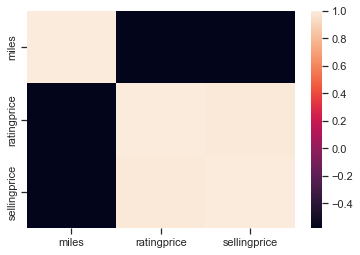

In [29]:
# inspect correlation

print(df.corr())
sns.heatmap(df.corr())

# Conclusion:


* ratingprice and sellingprice have a very high correlation, therefore I would remove the column "ratingprice" from the dataset.
* code is not necessary, therefore I would remove the column "code" from the dataset.
* saledate is also unnecessary, therefore I would remove the column "saledate" from the dataset.

* there are almost only automatic cars in "drivetrain" - not sure if I need this column for my model